#### Import Required Libraries
Import necessary libraries such as pandas, numpy, matplotlib, and seaborn for data analysis and visualization.

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train =pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sub =pd.read_csv('SampleSubmission.csv')

In [4]:
df =pd.read_csv('Train.csv')
df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [13]:
df.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


## Exploratory Data Analysis Practice: Tanzania Tourism Dataset


##### 1. **Missing Values Analysis**

***Task***:

 Visualize the proportion of missing values for each feature using a bar chart.

**Experimental Question:**

  - Which features have the highest proportion of missing values, and how might this affect the reliability of our analysis?


  - Are the missing values random, or do they show a pattern related to specific types of visitors or variables?




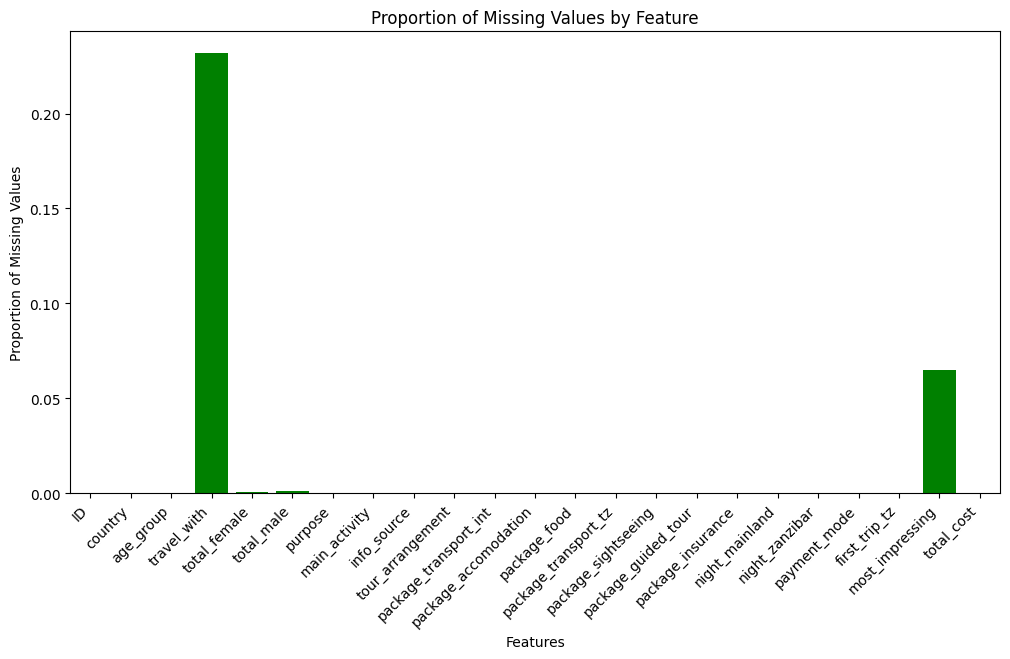

In [17]:
# Calculate the proportion of missing values for each feature
missing_values = df.isnull().mean()

# Plot the missing values as a bar chart
plt.figure(figsize=(12, 6)) # Set the figure size for better readability. This line sets the size of the figure to 12 inches wide and 6 inches tall, which helps in making the plot more readable and visually appealing.


plt.bar(missing_values.index, missing_values.values, color='green')  # Create a bar chart with green color
missing_values.plot(kind='bar', color='green') # Create a bar chart with green color

plt.title('Proportion of Missing Values by Feature')  # Set the title of the chart
plt.xlabel('Features')  # Label the x-axis
plt.ylabel('Proportion of Missing Values')  # Label the y-axis

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()  # Display the plot

2. Categorical Feature Distribution

Task:

 Visualize the distribution of values for each categorical variable using bar charts with target variable.

Experimental Questions:

- What are the most common categories in each variable (e.g., who do tourists most often travel with? What is the most common purpose of visit)?


- Are there any categories that are underrepresented or surprisingly dominant?


- Are any features heavily imbalanced, possibly requiring re-grouping or adjustment in future modeling?


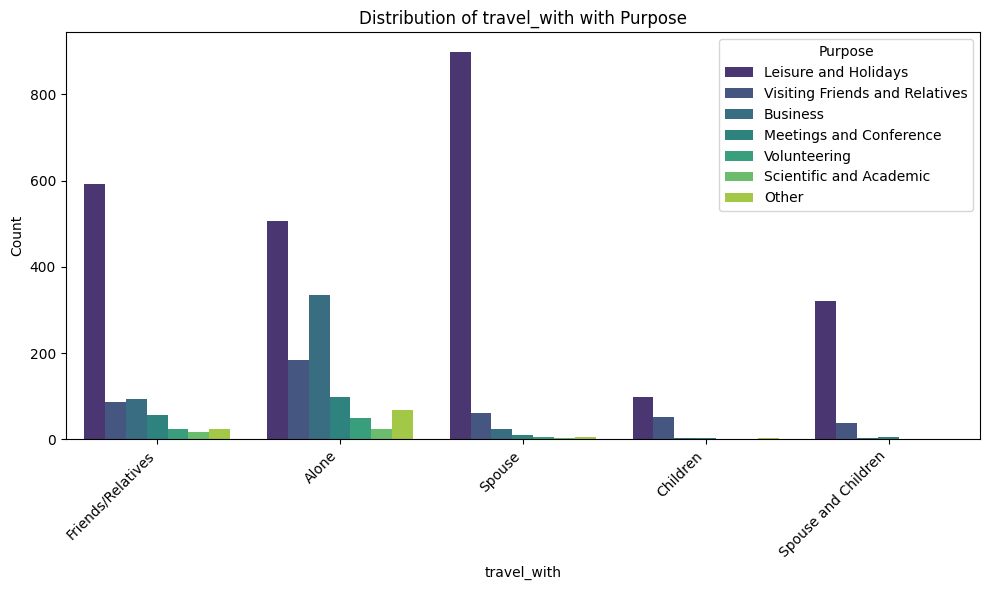

C:\Users\HP\AppData\Local\Temp\ipykernel_11996\3267232143.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Purpose')


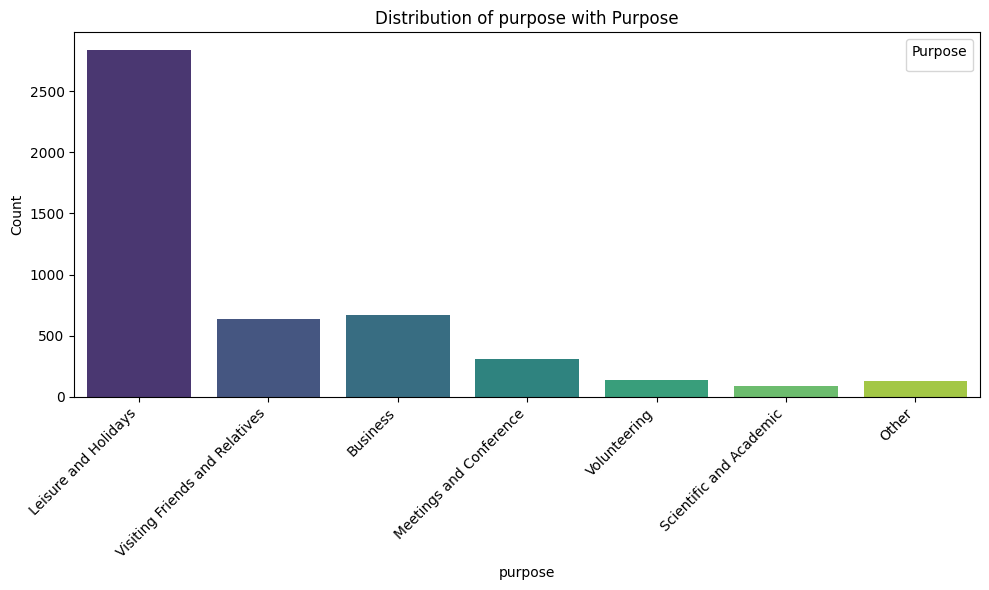

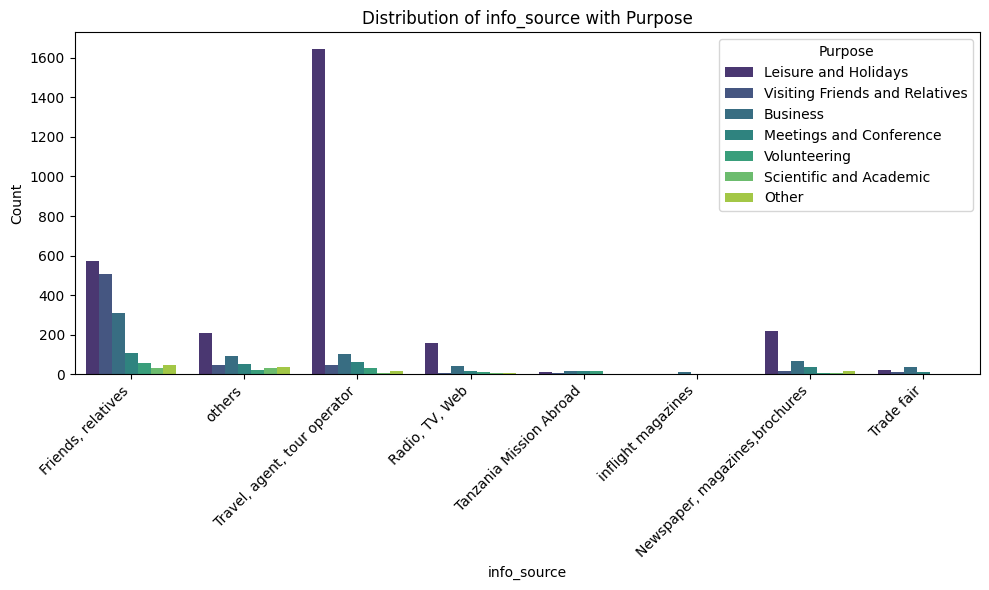

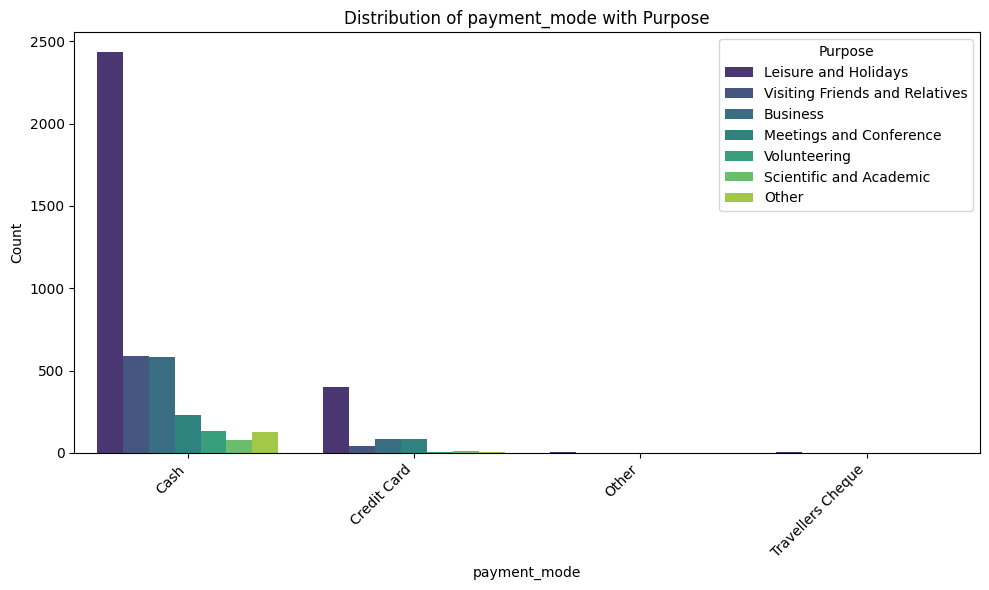

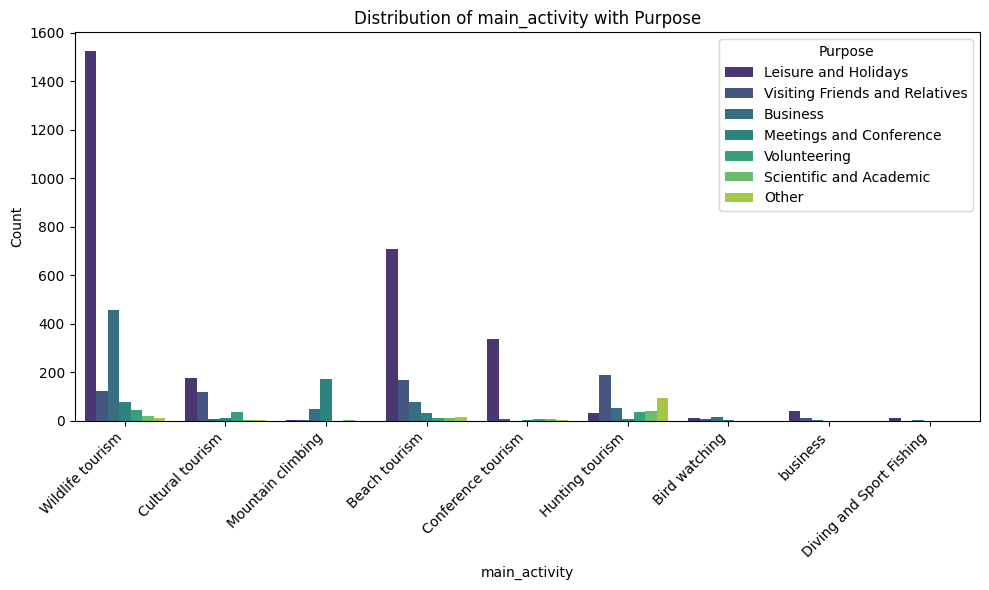

In [18]:
# Visualize the distribution of values for each categorical variable
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, hue='purpose', palette='viridis')
    plt.title(f'Distribution of {column} with Purpose')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Purpose')
    plt.tight_layout()
    plt.show()

### 3. Descriptive Statistics for Categorical Features

Task:

 Generate a statistical summary for all categorical features using the .describe() method.

Experimental Questions:

What is the most frequently occurring category in each feature, and what might this indicate about tourist behavior?


Do certain features show high or low diversity in values (e.g., many unique values vs. few repeated ones)?


Are there features where the top category dominates disproportionately?




In [22]:
# Generate a statistical summary for all categorical features
categorical_summary = df[categorical_columns].describe()

# Display the summary
print(categorical_summary)

       travel_with               purpose                   info_source  \
count         3695                  4809                          4809   
unique           5                     7                             8   
top          Alone  Leisure and Holidays  Travel, agent, tour operator   
freq          1265                  2840                          1913   

       payment_mode     main_activity  
count          4809              4809  
unique            4                 9  
top            Cash  Wildlife tourism  
freq           4172              2259  


#### 4. Boxplot of Total Cost by Age Group and Categorical Variables

Task:

 Create boxplots to analyze how total_cost varies by age_group across the following variables:

- travel_with
- purpose
- info_source
- payment_mode
- main_activity


Experimental Questions:

How does the spending behavior vary across different age group

Do certain travel companions (e.g., traveling alone vs. with family) influence cost significantly within each age group?


Are specific purposes of travel (e.g., leisure vs. business) associated with higher spending, and does this vary by age?


Do the sources of travel information or payment methods correlate with higher or lower costs?


Which main tourism activities are associated with the highest spending, and are younger or older tourists more likely to engage in them?




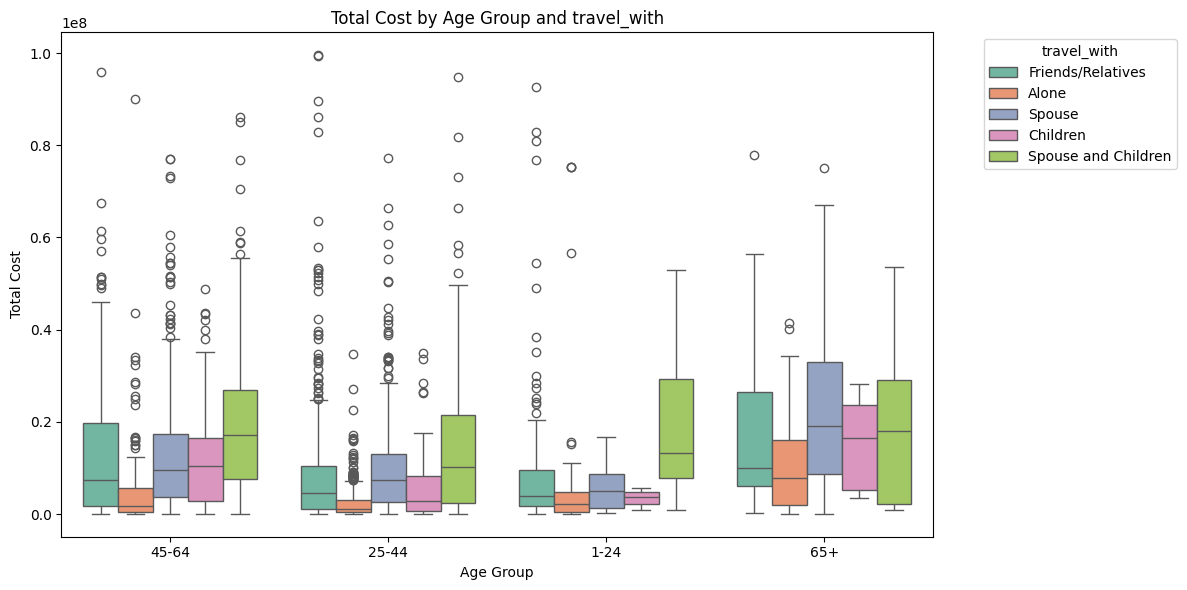

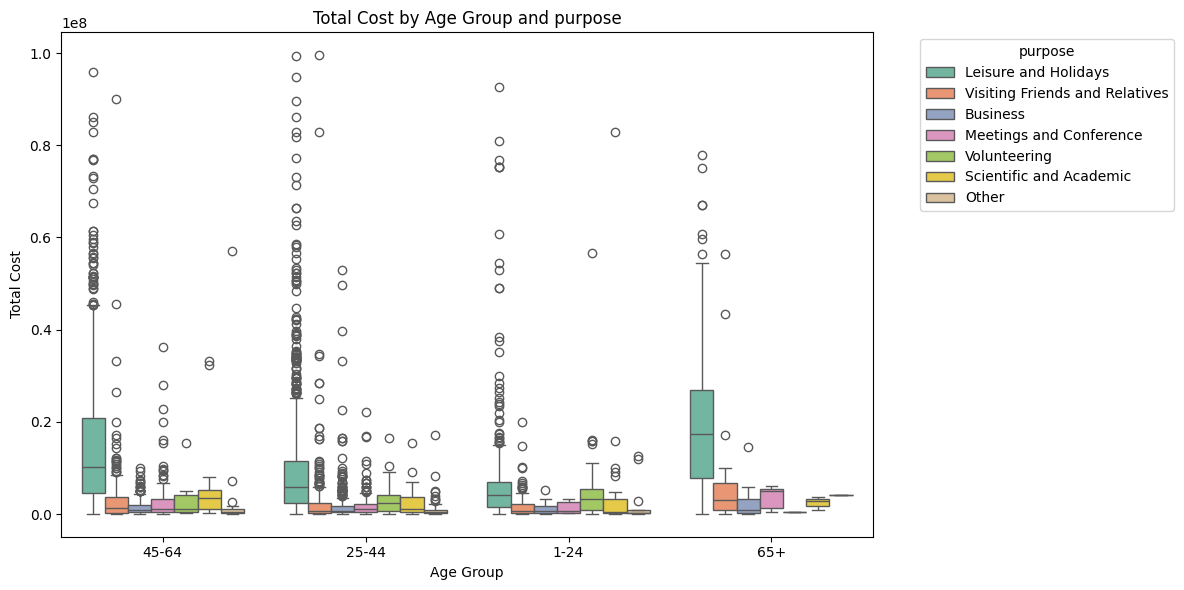

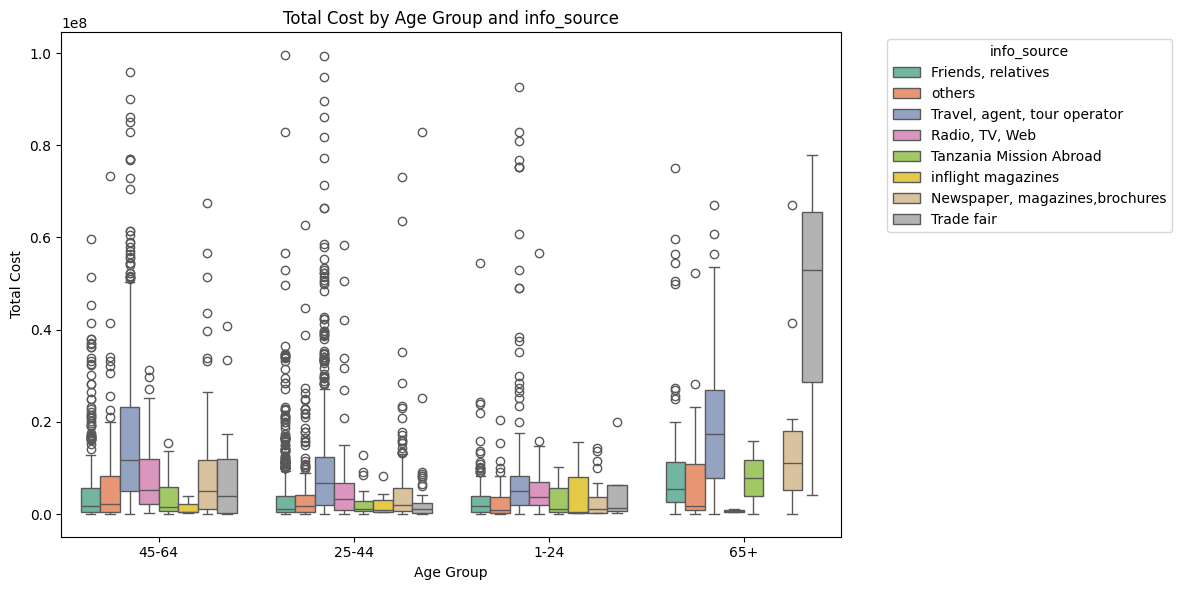

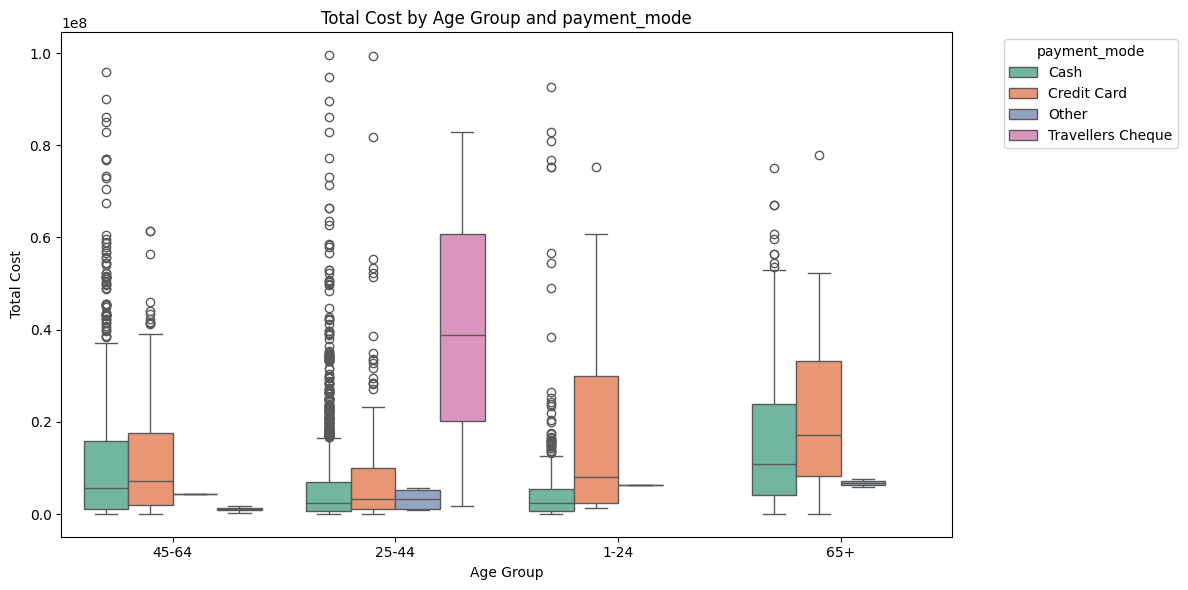

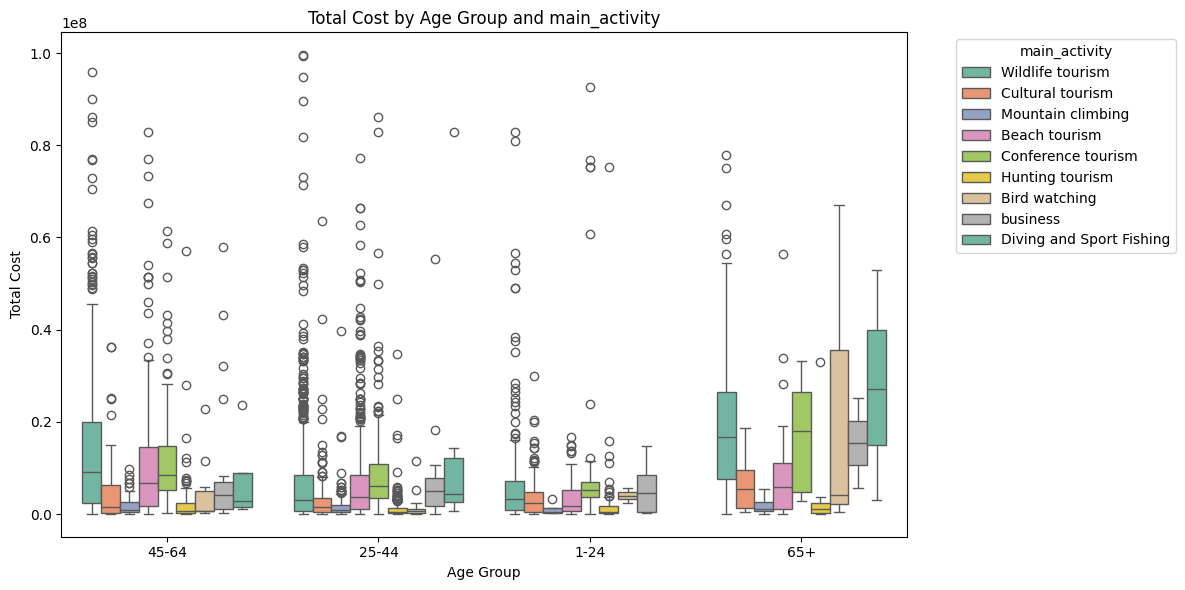

In [20]:
# Create boxplots for total_cost by age_group across specified categorical variables
for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='age_group', y='total_cost', hue=column, palette='Set2')
    plt.title(f'Total Cost by Age Group and {column}')
    plt.xlabel('Age Group')
    plt.ylabel('Total Cost')
    plt.legend(title=column, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

5. Subset Analysis: Ethiopian Tourists
Task:
 Filter the dataset to focus on tourists from Ethiopia. Perform EDA specific to this subgroup.
Experimental Questions:
What are the most common age groups, travel companions, and purposes of visit among Ethiopian tourists?


How does the spending pattern of Ethiopian tourists compare to the overall dataset?


Are there notable differences in the preferred activities or payment methods for Ethiopian tourists?


Does this group show any unique trends or behaviors that may inform targeted marketing or tourism policy?



In [1]:
# Filter the dataset for Ethiopian tourists
ethiopian_tourists = df[df['country'] == 'ETHIOPIA']

# Display basic information about the subset
print("Ethiopian Tourists Dataset Overview:")
print(ethiopian_tourists.info())

# Analyze the most common age groups, travel companions, and purposes of visit
print("\nMost Common Age Groups:")
print(ethiopian_tourists['age_group'].value_counts())

print("\nMost Common Travel Companions:")
print(ethiopian_tourists['travel_with'].value_counts())

print("\nMost Common Purposes of Visit:")
print(ethiopian_tourists['purpose'].value_counts())

# Compare spending patterns
print("\nSpending Pattern Comparison:")
print("Average Total Cost (Ethiopian Tourists):", ethiopian_tourists['total_cost'].mean())
print("Average Total Cost (Overall):", df['total_cost'].mean())

# Analyze preferred activities and payment methods
print("\nPreferred Main Activities:")
print(ethiopian_tourists['main_activity'].value_counts())

print("\nPreferred Payment Methods:")
print(ethiopian_tourists['payment_mode'].value_counts())

# Visualize spending patterns
plt.figure(figsize=(10, 6))
sns.boxplot(data=ethiopian_tourists, x='age_group', y='total_cost', palette='Set2')
plt.title('Spending Patterns by Age Group (Ethiopian Tourists)')
plt.xlabel('Age Group')
plt.ylabel('Total Cost')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined